## Importação das bibliotecas

In [1]:
# Importando a biblioteca pandas, importante para tratamento dos dados importados
import pandas as pd

# Importando a biblioteca pyplot e seaborn, importante para visualização dos dados importados
import matplotlib.pyplot as plt
import seaborn as sns

# Importando a biblioteca requests, para requisitar a fonte dos dados (Github)
import requests

# Importando bibliotecas io e ftfy, para tratamento de codificação de caracteres truncados (utf-8)
from io import StringIO
import ftfy

## Carregamento dos dados

In [2]:
# Carregando dados diretamento do github e corrigindo problemas de codificação
url = requests.get('https://raw.githubusercontent.com/Ada-Empregabilidade/adahack-2024-dados/main/base_dados/base_de_dados.csv').content.decode('utf-8')
linhas = url.split('\n')
lista_linhas = [ftfy.fix_text(linha) for linha in linhas]
data = StringIO('\n'.join(lista_linhas))
df = pd.read_csv(data)

_Optamos por utilizar as informaçoes diretamente da fonte de dados, ao invés de baixa-las e adiciona-las manualmente. O arquivo csv fornecido contém problemas de codificação e também optamos por fazer o tratamento dentro do notebook._

## Exploração inicial dos dados

##### Primeiro contato com os dados

In [3]:
# Comando head para exibir as 10 primeiras linhas do dataset
df.head(10)

,id,id.1,Nome,Genero,Idade,Raça,Endereço,Formação,Estado,Tempo de casa,Departamento,Senioridade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\nSellersside, FL 21337",Ensino Médio,Santa Catarina,12.0,Compras,Analista Pleno
1,2,2,Elisângela Gabrielle de Osório,Fem,26.0,pardo,"941 Martin Manor\nLake Isaiahtown, FM 43797",Ensino Médio,Pará,6.0,Contabilidade,Analista Júnior
2,3,3,José Túlio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\nMejiaville, LA 17095",Ensino Médio,Santa Catarina,5.0,Vendas,Analista Pleno
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\nSmithborough, NV 0...",Ensino Superior,Tocantins,4.0,Administrativo,Gerente
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\nSandraport, MN 33570",Ensino Superior,Ceará,5.0,Recursos Humanos,Analista Júnior
5,6,6,Magali Luzimara da Silva,Fem,49.0,pardo,"073 Padilla Dam\nPort Joshualand, MA 65043",Ensino Superior,São Paulo,3.0,Contabilidade,Analista Pleno
6,7,7,Victor Plínio Shufrouze,Masc,29.0,pardo,"112 Rose Corners\nStanleyberg, IA 13588",Pós graduação,Ceará,9.0,Compras,Analista Sênior
7,8,8,Laércio Rossi,Masc,35.0,pardo,"508 Sean Road Apt. 754\nWest Thomaschester, AL...",Ensino Superior,Rondônia,8.0,Operações,Analista Júnior
8,9,9,Francisco Ângelo de Toledo Seixas,Masc,40.0,pardo,"9762 Goodwin Plain Apt. 560\nSchroedershire, P...",Mestrado,Amapá,1.0,Administrativo,Analista Pleno
9,10,10,Fabrício Rangel de Gonçalves dos Santos,Masc,33.0,pardo,"4979 Dana Station Apt. 126\nMichellefurt, HI 2...",Ensino Superior,Minas Gerais,3.0,Desenvolvimento de Produtos,Analista Pleno


_Aqui já encontramos algumas anomalias, que serão tratadas ao longo do processo de limpeza, tais como:_
1. _Coluna 'id' e 'id.1' duplicadas._
2. _Coluna 'Idade' com valores negativos._
3. _'Endereço' estadunidense com uma quebra de linha não reconhecida_
4. _'Formação' possui valores nulos._
5. _Coluna 'Tempo de casa' com valores negativos_
6. _Coluna 'Senioridade' com diferentes grafias para um mesmo cargo_

##### Compreendendo as variáveis qualitativas

In [4]:
#Valores únicos para a variável 'Raça'
df['Raça'].unique()

array(['pardo', 'preto', 'branco', 'indígena', 'amarelo'], dtype=object)

In [5]:
#Valores únicos para a variável 'Genero'
df['Genero'].unique()

array(['Fem', 'Masc'], dtype=object)

In [6]:
#Valores únicos para a variável 'Formação'
df['Formação'].unique()

array(['Ensino Médio', 'Ensino Superior', 'Pós graduação', 'Mestrado',
       'Doutorado', nan], dtype=object)

In [7]:
#Valores únicos para a variável 'Estado'
df['Estado'].unique()

array(['Santa Catarina', 'Pará', 'Tocantins', 'Ceará', 'São Paulo',
       'Rondônia', 'Amapá', 'Minas Gerais', 'Acre', 'Roraima', 'Amazonas',
       'Paraná', 'Bahia', 'Piauí', 'Goiás', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Pernambuco', 'Mato Grosso',
       'Rio Grande do Sul', 'Espírito Santo', 'Maranhão', 'Paraíba',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Alagoas'],
      dtype=object)

In [8]:
#Valores únicos para a variável 'Departamento'
df['Departamento'].unique()

array(['Compras', 'Contabilidade', 'Vendas', 'Administrativo',
       'Recursos Humanos', 'Operações', 'Desenvolvimento de Produtos',
       'Marketing', 'TI'], dtype=object)

In [9]:
#Valores únicos para a variável 'Senioridade'
df['Senioridade'].unique()

array(['Analista Pleno', 'Analista Júnior', 'Gerente', 'Analista Sênior',
       'Estagiário', 'Diretor', 'gerente'], dtype=object)

_Podemos compreender os diferentes tipos de variáveis, e como estão distribuidas ao longo do dataset_

##### Tamanho da base de dados

In [10]:
#Entendendo o tamanho da base de dados
print(f'O presente dataset posssui {df.shape[0]} linhas e {df.shape[1]} colunas. ')

O presente dataset posssui 10000 linhas e 12 colunas. 


In [11]:
# Listando colunas
df.columns

Index(['id', 'id.1', 'Nome', 'Genero', 'Idade', 'Raça', 'Endereço', 'Formação',
       'Estado', 'Tempo de casa', 'Departamento', 'Senioridade'],
      dtype='object')

##### Estatística Descritiva

In [12]:
# Panorama estatístico das colunas numéricas do dataset
df.describe()

,id,id.1,Idade,Tempo de casa
count,10000.00000,10000.00000,9944.000000,9800.000000
mean,5000.50000,5000.50000,30.827836,5.490510
std,2886.89568,2886.89568,8.738915,2.963759
min,1.00000,1.00000,5.000000,-6.000000
25%,2500.75000,2500.75000,24.000000,3.000000
50%,5000.50000,5000.50000,30.000000,5.000000
75%,7500.25000,7500.25000,37.000000,8.000000
max,10000.00000,10000.00000,74.000000,17.000000


In [13]:
# Panorama estatístico das colunas não-numéricas do dataset
df_nao_numerico = df.select_dtypes(exclude='number')
df_nao_numerico.describe()

,Nome,Genero,Raça,Endereço,Formação,Estado,Departamento,Senioridade
count,10000,10000,10000,10000,9956,10000,10000,10000
unique,9961,2,5,10000,5,27,9,7
top,Francisco da Silva,Masc,pardo,"9155 Harold Oval\nSellersside, FL 21337",Ensino Superior,São Paulo,Administrativo,Analista Júnior
freq,2,7500,4700,1,5972,1000,1112,3000


##### Tipos de variáveis

In [14]:
# Verificando tipos de variáveis por cada coluna.
tipos_de_dados = df.info()
display(tipos_de_dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   id.1           10000 non-null  int64  
 2   Nome           10000 non-null  object 
 3   Genero         10000 non-null  object 
 4   Idade          9944 non-null   float64
 5   Raça           10000 non-null  object 
 6   Endereço       10000 non-null  object 
 7   Formação       9956 non-null   object 
 8   Estado         10000 non-null  object 
 9   Tempo de casa  9800 non-null   float64
 10  Departamento   10000 non-null  object 
 11  Senioridade    10000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


None

_Acima percebemos que os tipos de dados estão praticamente conformes, exceto pela coluna 'Idade', que não precisa ser do tipo float e deve ser um número inteiro. O mesmo acontece com a coluna 'Tempo de casa'._

## Limpeza e preparação dos dados

##### Removendo linhas duplicadas

In [15]:
#remover duplicatas
df = df.drop_duplicates()

In [11]:
#Remover colunas desnecessárias
df = df.drop(columns=['id', 'id.1', 'Nome', 'Endereço'])

##### Lidando com dados faltantes

In [17]:
#Relacionando dados faltantes
df.isna().sum()

Genero             0
Idade             56
Raça               0
Formação          44
Estado             0
Tempo de casa    200
Departamento       0
Senioridade        0
dtype: int64

_O número de linhas com valores nulos é no total 300, o que representa 3% da quantidade de linhas totais do dataset, por isso iremos retirá-las ao invés de preencher com valores tais como média, mediana, etc._

Sugestão Iago:
Considerando que esses dados faltantes, como de atributos diferentes temos: 56+44+200 = 300. Como temos um total de 10000 observações é razoalvel eliminar esses dados. Representa eliminasr 300/10000, ou seja, 3% dos dados.

In [18]:
#Deletar dados faltantes
df = df.dropna(axis=0, how='any', inplace=False)

In [19]:
#Conferindo resultados
df.isna().sum()

Genero           0
Idade            0
Raça             0
Formação         0
Estado           0
Tempo de casa    0
Departamento     0
Senioridade      0
dtype: int64

##### Removendo dados inválidos

In [22]:
# Encontrando tempos de experiência negativos
tempo_casa_negativo = df.loc[df['Tempo de casa'] < 0]
display(tempo_casa_negativo)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
62,Masc,25.0,pardo,Ensino Superior,Paraná,-2.0,Desenvolvimento de Produtos,Analista Sênior
105,Masc,39.0,preto,Ensino Superior,Rio Grande do Sul,-3.0,Marketing,Analista Pleno
118,Fem,35.0,pardo,Mestrado,Rio de Janeiro,-2.0,Vendas,Analista Júnior
428,Masc,28.0,preto,Mestrado,Paraná,-2.0,Compras,Analista Sênior
574,Masc,28.0,branco,Ensino Superior,Rio Grande do Sul,-2.0,Operações,Analista Júnior
...,...,...,...,...,...,...,...,...
9648,Masc,22.0,preto,Ensino Superior,Rio Grande do Sul,-1.0,Administrativo,Gerente
9655,Masc,32.0,branco,Ensino Superior,São Paulo,-1.0,Operações,Analista Pleno
9727,Masc,19.0,branco,Ensino Superior,Rio Grande do Sul,-2.0,Operações,Analista Sênior
9826,Fem,19.0,pardo,Ensino Superior,Distrito Federal,-1.0,Operações,Gerente


In [24]:
df.shape

(9701, 8)

Sugestão Iago:

Analisando a coluna 'Tempo de casa' encontramos 98 observações com valor negativo. O que não parece fazer sentido. Como repesentam 98/9689 = 0.01, ou seja, 1% é razoável eliminar essas linhas.

In [27]:
# Encontrando tempos de casa zerados
tempo_casa_zero = df.loc[df['Tempo de casa'] == 0]
display(tempo_casa_zero)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
23,Masc,31.0,branco,Ensino Médio,Amazonas,0.0,Operações,Estagiário
29,Fem,29.0,branco,Ensino Superior,Paraná,0.0,Administrativo,Gerente
38,Fem,27.0,preto,Ensino Médio,Mato Grosso,0.0,Administrativo,Analista Júnior
41,Masc,34.0,branco,Ensino Superior,Pernambuco,0.0,TI,Analista Sênior
86,Fem,47.0,pardo,Ensino Superior,Piauí,0.0,TI,Analista Sênior
...,...,...,...,...,...,...,...,...
9807,Fem,51.0,branco,Ensino Superior,Rio de Janeiro,0.0,Administrativo,Gerente
9871,Masc,30.0,pardo,Ensino Superior,Acre,0.0,TI,Analista Pleno
9919,Masc,29.0,branco,Ensino Superior,Santa Catarina,0.0,Vendas,Analista Sênior
9946,Fem,41.0,pardo,Ensino Superior,Amazonas,0.0,Contabilidade,Analista Júnior


_Os valores zerados para a variável 'Tempo de casa', não serão excluídas, porque entendemos não serem inválidas, apenas que os funcionários não alcançaram 1 (um) ano._

In [30]:
df = df.drop(df[df['Tempo de casa'] < 0 ].index)
df.shape

(9605, 8)

In [34]:
#Conferindo resultados
tempo_casa_negativo = df.loc[df['Tempo de casa'] < 0]
display(tempo_casa_negativo)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade


In [28]:
# Encontrando Idades inválidas (menores de idade)
menor_idade = df.loc[df['Idade'] < 18]
display(menor_idade)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
2581,Masc,12.0,preto,Ensino Superior,Ceará,2.0,Marketing,Analista Pleno
3886,Fem,6.0,preto,Ensino Superior,Alagoas,9.0,Recursos Humanos,Analista Júnior
4777,Masc,16.0,indígena,Pós graduação,Ceará,1.0,TI,Gerente
4928,Fem,13.0,preto,Ensino Superior,Amapá,7.0,Vendas,Analista Pleno
5001,Masc,17.0,preto,Ensino Superior,Amapá,2.0,Contabilidade,Analista Júnior
5845,Masc,16.0,preto,Ensino Superior,Paraná,4.0,Compras,Analista Pleno
5948,Masc,17.0,preto,Ensino Superior,Mato Grosso,10.0,TI,Analista Pleno
6599,Fem,15.0,indígena,Ensino Superior,Ceará,5.0,Recursos Humanos,Estagiário
6684,Masc,15.0,preto,Ensino Superior,Mato Grosso do Sul,9.0,Recursos Humanos,Analista Júnior
7173,Masc,10.0,preto,Pós graduação,Rio de Janeiro,5.0,Desenvolvimento de Produtos,Analista Pleno


Sugestão Iago:

Analisando a coluna Idade junto a coluna Formação, não faz sentido esses dados com Idade menor que 18 anos. Como repesentam 12/9605 = 0.001, ou seja, 0,1% é razoázvel eliminar essas linhas.

In [35]:

df = df.drop(df[df['Idade'] < 18].index)

In [36]:
#Conferindo resultados
menor_idade = df.loc[df['Idade'] < 18]
display(menor_idade)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade


In [37]:
tempo_casa_idade = df[df['Tempo de casa'] > df['Idade']]
display(tempo_casa_idade)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade


In [38]:
tempo_casa_alto = df[df['Tempo de casa'] >= 17]
display(tempo_casa_alto)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
5682,Masc,31.0,branco,Ensino Superior,Rio de Janeiro,17.0,Marketing,Analista Sênior


In [39]:
tempo_casa_menor_idade = df[(df['Idade'] - df['Tempo de casa']) < 18]
display(tempo_casa_menor_idade)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
4,Masc,21.0,pardo,Ensino Superior,Ceará,5.0,Recursos Humanos,Analista Júnior
12,Masc,18.0,preto,Pós graduação,Santa Catarina,8.0,Administrativo,Analista Júnior
14,Masc,19.0,branco,Ensino Médio,Amazonas,6.0,Administrativo,Analista Júnior
18,Masc,18.0,branco,Ensino Médio,Ceará,5.0,Contabilidade,Gerente
32,Fem,18.0,branco,Mestrado,Piauí,5.0,Marketing,Analista Júnior
...,...,...,...,...,...,...,...,...
9986,Masc,19.0,preto,Pós graduação,Santa Catarina,3.0,Recursos Humanos,Analista Sênior
9989,Masc,21.0,pardo,Pós graduação,Piauí,9.0,Compras,Analista Júnior
9992,Masc,28.0,branco,Ensino Superior,Santa Catarina,13.0,Compras,Diretor
9995,Masc,21.0,pardo,Ensino Superior,Rondônia,9.0,Contabilidade,Analista Júnior


# *TEMOS UM PROBLEMA AQUI*

In [ ]:
850/2

Sugestão Iago:

Explicar.

## Manipulação e transformação dos dados

##### Tipos de variáveis

In [40]:
# Verificando tipos de variáveis das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9593 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genero         9593 non-null   object 
 1   Idade          9593 non-null   float64
 2   Raça           9593 non-null   object 
 3   Formação       9593 non-null   object 
 4   Estado         9593 non-null   object 
 5   Tempo de casa  9593 non-null   float64
 6   Departamento   9593 non-null   object 
 7   Senioridade    9593 non-null   object 
dtypes: float64(2), object(6)
memory usage: 674.5+ KB


In [41]:
#Verificando se realmente existem números decimais nas colunas 'Idade' e 'Tempo de casa'
df_decimais = df.loc[(df['Idade'] % 1 != 0) & (df['Tempo de casa'] % 1 != 0)]
df_decimais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genero         0 non-null      object 
 1   Idade          0 non-null      float64
 2   Raça           0 non-null      object 
 3   Formação       0 non-null      object 
 4   Estado         0 non-null      object 
 5   Tempo de casa  0 non-null      float64
 6   Departamento   0 non-null      object 
 7   Senioridade    0 non-null      object 
dtypes: float64(2), object(6)
memory usage: 0.0+ bytes


In [42]:
# Convertendo as colunas Idade e Tempo de Casa para (INT)
df['Idade'] = df['Idade'].astype(int)
df['Tempo de casa'] = df['Tempo de casa'].astype(int)

In [43]:
# Conferindo resultados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9593 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Genero         9593 non-null   object
 1   Idade          9593 non-null   int64 
 2   Raça           9593 non-null   object
 3   Formação       9593 non-null   object
 4   Estado         9593 non-null   object
 5   Tempo de casa  9593 non-null   int64 
 6   Departamento   9593 non-null   object
 7   Senioridade    9593 non-null   object
dtypes: int64(2), object(6)
memory usage: 674.5+ KB


##### Corrigindo grafias

In [44]:
df['Senioridade'] = df['Senioridade'].replace('gerente', 'Gerente')

In [45]:
df['Genero'] = df['Genero'].replace({'Fem' : 'Feminino', 'Masc' : 'Masculino'})

In [46]:
df['Raça'] = df['Raça'].replace({'preto' : 'Preto', 'pardo' : 'Pardo', 'branco' : 'Branco', 'indígena' : 'Indígena', 'amarelo' : 'Amarelo'})

In [47]:
df = df.rename(columns={'Genero': 'Gênero', 'Tempo de casa' : 'Tempo de Empresa'})

##### Coluna diversidade

In [48]:
# Criando coluna Diversidade para facilitar a visualização das diversidades presentes
df['Diversidade'] = df ['Raça'] != 'branco'

##### Organização

In [49]:
# Alterando a ordem das colunas para uma melhor visualização
nova_ordem_colunas = ['Gênero', 'Idade', 'Raça', 'Diversidade', 'Formação', 'Estado', 'Tempo de Empresa', 'Departamento', 'Senioridade']
df = df.reindex(columns=nova_ordem_colunas)

In [50]:
#Conferindo resultados das transformações
df.head(10)

,Gênero,Idade,Raça,Diversidade,Formação,Estado,Tempo de Empresa,Departamento,Senioridade
0,Feminino,34,Pardo,True,Ensino Médio,Santa Catarina,12,Compras,Analista Pleno
1,Feminino,26,Pardo,True,Ensino Médio,Pará,6,Contabilidade,Analista Júnior
2,Masculino,35,Pardo,True,Ensino Médio,Santa Catarina,5,Vendas,Analista Pleno
3,Masculino,24,Pardo,True,Ensino Superior,Tocantins,4,Administrativo,Gerente
4,Masculino,21,Pardo,True,Ensino Superior,Ceará,5,Recursos Humanos,Analista Júnior
5,Feminino,49,Pardo,True,Ensino Superior,São Paulo,3,Contabilidade,Analista Pleno
6,Masculino,29,Pardo,True,Pós graduação,Ceará,9,Compras,Analista Sênior
7,Masculino,35,Pardo,True,Ensino Superior,Rondônia,8,Operações,Analista Júnior
8,Masculino,40,Pardo,True,Mestrado,Amapá,1,Administrativo,Analista Pleno
9,Masculino,33,Pardo,True,Ensino Superior,Minas Gerais,3,Desenvolvimento de Produtos,Analista Pleno


## Análise e exploração dos dados

#### Como os colaboradores estão distribuídos de acordo com o gênero?

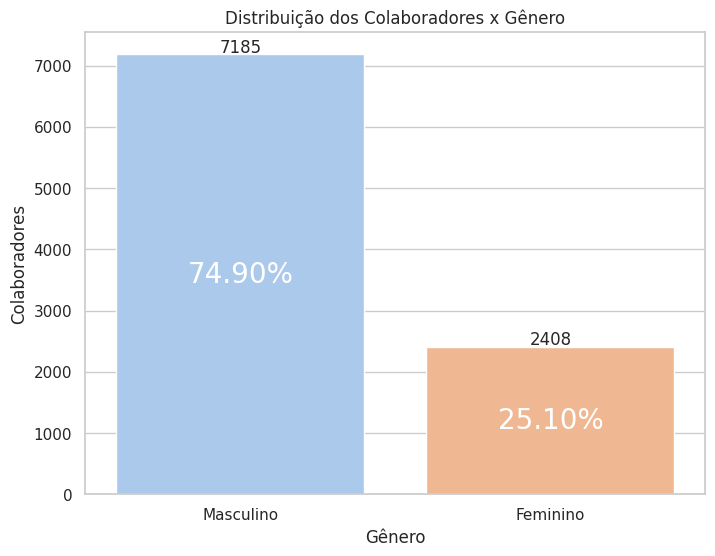

In [51]:
contagem_genero = df['Gênero'].value_counts()
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
barras = sns.barplot(x=contagem_genero.index, y=contagem_genero.values, palette="pastel", hue=contagem_genero.index, dodge=False, legend=False)

plt.title('Distribuição dos Colaboradores x Gênero')
plt.xlabel('Gênero')
plt.ylabel('Colaboradores')

for barra in barras.patches:
    barras.annotate(format(barra.get_height(), '.0f'), 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height()), 
                   ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

total = df.shape[0]
for barra in barras.patches:
    barras.annotate(f'{barra.get_height() / total:.2%}', 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height() / 2), 
                   ha='center', va='center',
                   size=20, xytext=(0, 0),
                   textcoords='offset points', color='white')
plt.show()

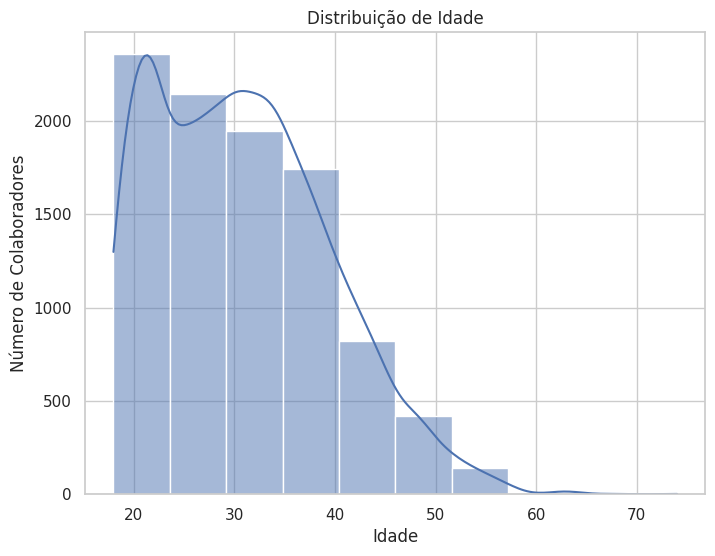

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
histograma = sns.histplot(data=df, x='Idade', bins=10, kde=True)

plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Colaboradores')

plt.show()

#### Identificar como é a distribuição de idade dos colaboradores.

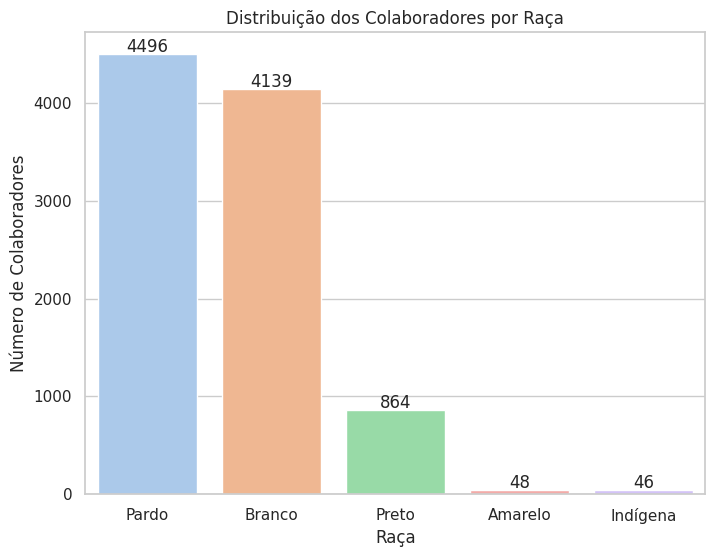

In [53]:
contagem_raca = df['Raça'].value_counts()
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
barras = sns.barplot(x=contagem_raca.index, y=contagem_raca.values, hue=contagem_raca.index, palette="pastel")

plt.title('Distribuição dos Colaboradores por Raça')
plt.xlabel('Raça')
plt.ylabel('Número de Colaboradores')

for barra in barras.patches:
    barras.annotate(format(barra.get_height(), '.0f'), 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height()), 
                   ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

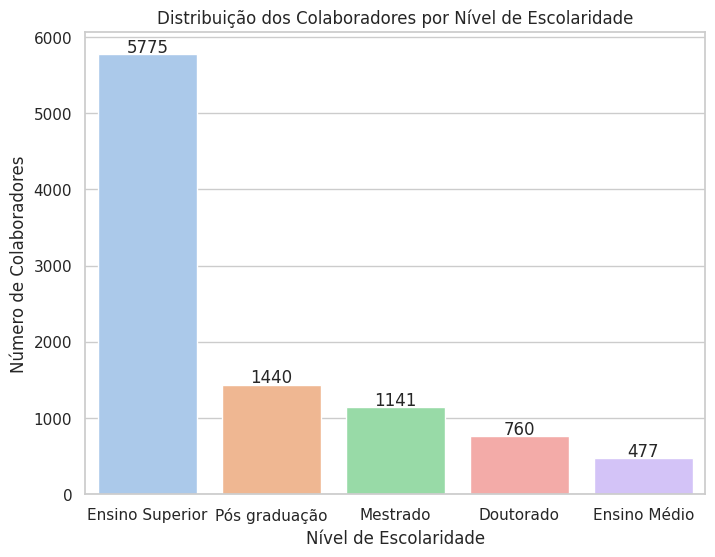

In [54]:
contagem_escolaridade = df['Formação'].value_counts()
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
barras = sns.barplot(x=contagem_escolaridade.index, y=contagem_escolaridade.values, hue=contagem_escolaridade.index, palette="pastel")

plt.title('Distribuição dos Colaboradores por Nível de Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de Colaboradores')

for barra in barras.patches:
    barras.annotate(format(barra.get_height(), '.0f'), 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height()), 
                   ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

#### Como os colaboradores estão distribuídos de acordo com região(Nordeste, Sul, etc)?

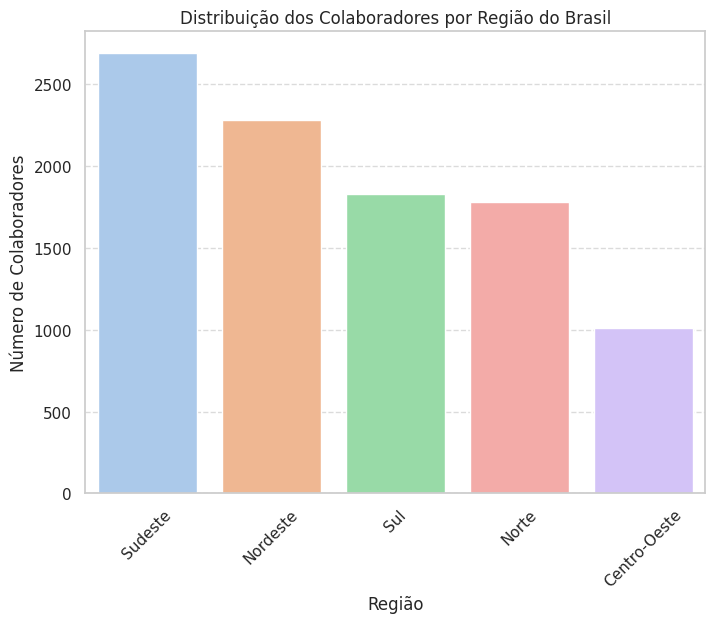

In [55]:
regioes = {
    'Acre': 'Norte', 'Alagoas': 'Nordeste', 'Amapá': 'Norte', 'Amazonas': 'Norte', 'Bahia': 'Nordeste', 'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste', 'Espírito Santo': 'Sudeste', 'Goiás': 'Centro-Oeste', 'Maranhão': 'Nordeste', 'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste', 'Minas Gerais': 'Sudeste', 'Pará': 'Norte', 'Paraíba': 'Nordeste', 'Paraná': 'Sul', 'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste', 'Rio de Janeiro': 'Sudeste', 'Rio Grande do Norte': 'Nordeste', 'Rio Grande do Sul': 'Sul', 'Rondônia': 'Norte', 'Roraima': 'Norte', 
    'Santa Catarina': 'Sul', 'São Paulo': 'Sudeste', 'Sergipe': 'Nordeste', 'Tocantins': 'Norte'
}

df['Região'] = df['Estado'].map(regioes)

contagem_regiao = df['Região'].value_counts()


sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_regiao.index, y=contagem_regiao.values, hue=contagem_regiao.index, palette="pastel")
plt.title('Distribuição dos Colaboradores por Região do Brasil')
plt.xlabel('Região')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Como os colaboradores estão distribuídos de acordo com o Estado?

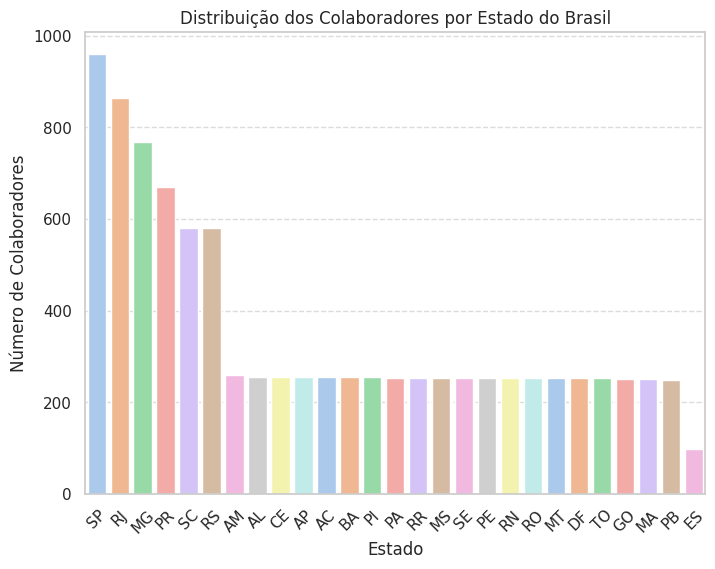

In [56]:
uf = {
        'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
        'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
        'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
        'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
        'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
        'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
        'Sergipe': 'SE', 'Tocantins': 'TO'
}
    
df['UF'] = df['Estado'].map(uf)
contagem_estado = df['UF'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_estado.index, y=contagem_estado.values, hue=contagem_estado.index, palette="pastel")
plt.title('Distribuição dos Colaboradores por Estado do Brasil')
plt.xlabel('Estado')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Visualização dos resultados

### Comunicação dos resultados

In [ ]:
df.to_csv('tratado.csv')

In [ ]:
df